# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [2]:
np.random.seed(0)
numpoints = 100
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

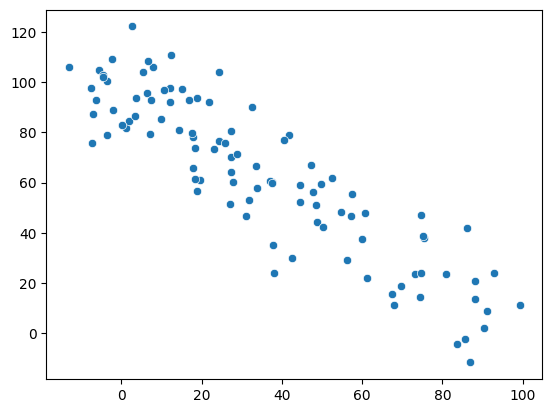

In [3]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [4]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

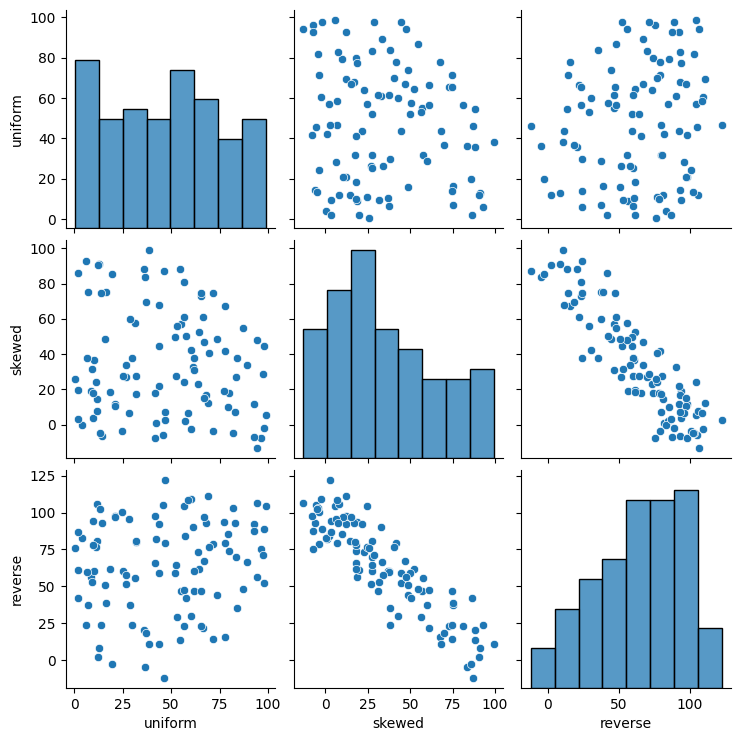

In [5]:
sns.pairplot(df)

We can compute the correlation coefficience between each pair.

In [6]:
df.corr()

,uniform,skewed,reverse
uniform,1.000000,-0.145022,0.149771
skewed,-0.145022,1.000000,-0.894549
reverse,0.149771,-0.894549,1.000000


In [7]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

**Q: What is a correlation telling us?**

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

- The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

**Q: How do you decide if a correlation is strong?**

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

**Q: What is the purpose of finding a correlation?**

Here are a few:

1. *Variables that are correlated with a target variable might be especially useful in predicting that variable.*  
    - This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  
    - In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  
    - If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  
    - If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

**A waterfall chart shows a value after a sequence of inputs and outputs.**

In [8]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_5135/2082488306.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='None'>

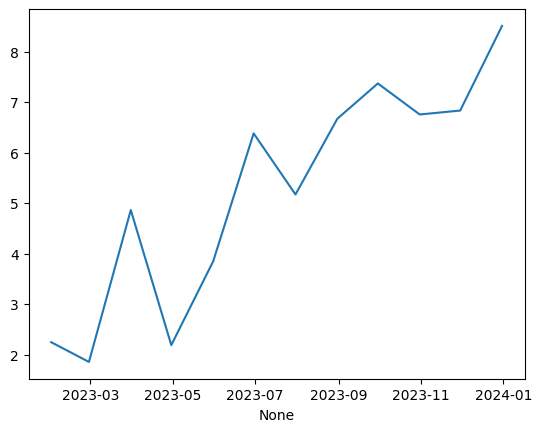

In [9]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
sns.lineplot(x = datearray, y = time_series)

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

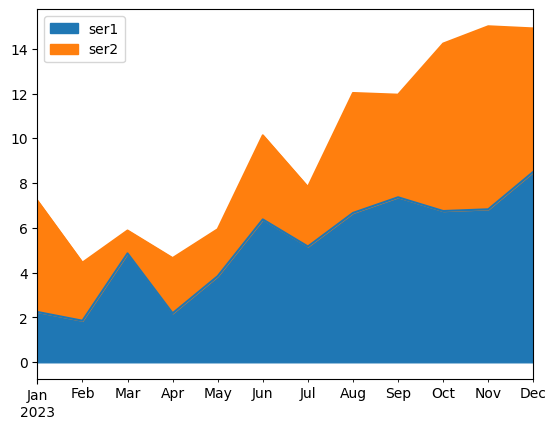

In [10]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

___

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  How would you alter the way these graphs are displayed to make them clearer or more informative?  Would you fit any of these graphs to a line or curve?  Why or why not?  What if you had to choose just _one_?  What if you had to choose _six_?

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

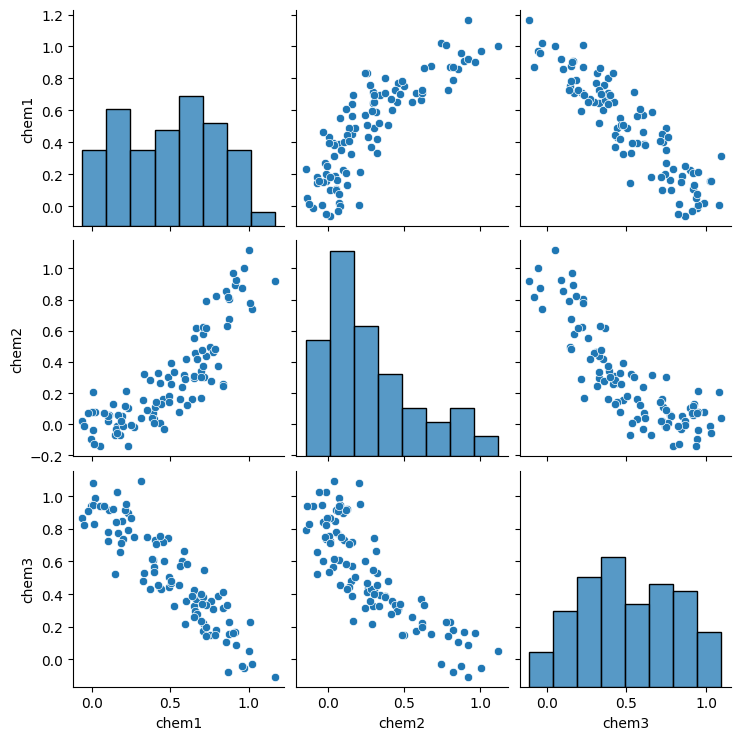

In [12]:
sns.pairplot(df_chem)

____

#### **Weekly Graph Question Answer**

*Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.*

1. **If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?**
    - If I had to choose three of the nine graphs to display, I would choose the following combinations: 
        - Chem 1 vs. Chem 2 
        - Chem 1 vs. Chem 3
        - Chem 2 vs. Chem 3
    - I would choose these because if you look closely at the correlation matrix, you'll realize that there are
    six bivariate distributions split into pairs, and that 3 of these distributions are redundant -- For instance, 
    Chem 1 vs. Chem 2 is really just telling the same story as Chem 2 vs. Chem 1 -- The only difference between these 
    two is which of the variables is on the x - axis. Therefore, in order to cut down on redundant information, and possibly to
    reduce possible sources of confusion, I would reduce the six bivariate correlations to just these three.
2. **How would you alter the way these graphs are displayed to make them clearer or more informative?**
    - If I were presenting this data, I would split the data into two groups. First I would display the histograms of each of the variables, and I would use that time to talk about the distributions of each one. After that, I would display the three scatter plots of the correlations that I mentioned above. I would use this time to talk about how the variables relate *to each other*. 
    
3. **Would you fit any of these graphs to a line or curve?  Why or why not?**
4. **What if you had to choose just _one_?  What if you had to choose _six_?**

___

# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

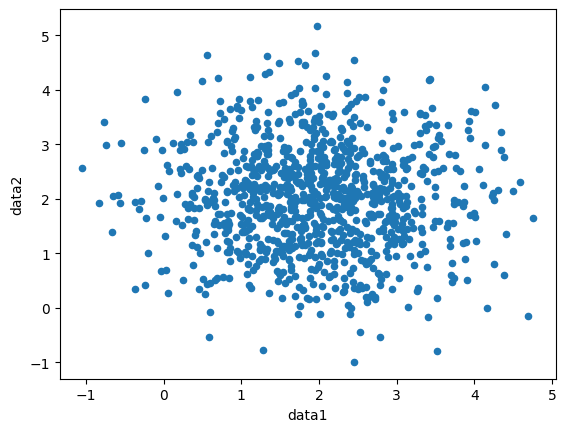

In [13]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

*This wasn't working locally in VS Code, but I was able to get the gist of it by checking what the following cell generated in GitHub*

In [14]:
# from IPython.display import image
# Image("twoclouds.png")

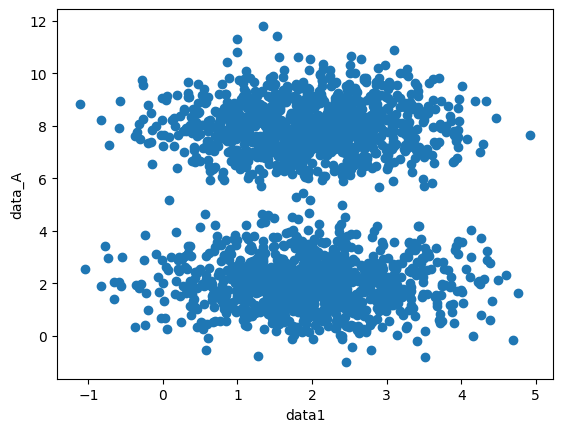

In [15]:
num_points = 1000
np.random.seed(0)

# First cluster
data1_a = np.random.normal(size=num_points) + 2
data_A = np.random.normal(size=num_points) + 2

# Second cluster (shifted upwards)
data1_b = np.random.normal(size=num_points) + 2
data_B = np.random.normal(size=num_points) + 8  # Shift the second cluster

# Combine the two clusters
data1 = np.concatenate([data1_a, data1_b])
data_A = np.concatenate([data_A, data_B])

df_twonorm = pd.DataFrame({"data1": data1, "data_A": data_A})


plt.scatter(df_twonorm["data1"], df_twonorm["data_A"])
plt.xlabel("data1")
plt.ylabel("data_A")
plt.show()


**Cite: ChatGPT was used for this problem:**
- Link: https://chatgpt.com/share/67a64ae7-66dc-800f-9c13-246e16ecdb7e

___

**Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.**

Note: The IPython.display image was erroring out locally so I commented it out in order to get rid of the error message, but I got the general gist by checking the notebook on GitHub

In [16]:
# from IPython.display import Image
# Image("threeclouds.png")

The following was adapted from the code above (the one that used ChatGPT) except this time, I added a third set of data points 

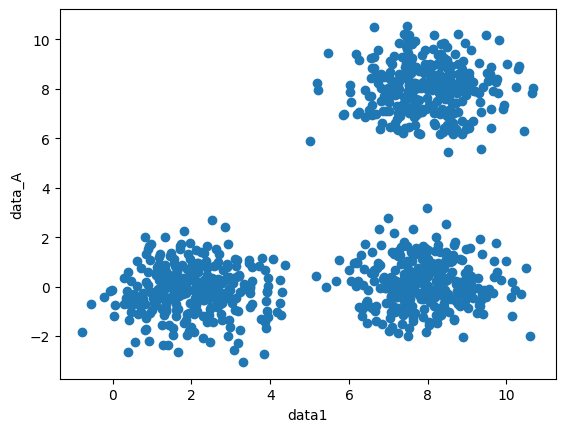

In [17]:
num_points = 300
np.random.seed(0)

# First cluster
data1_a = np.random.normal(size=num_points) + 2
data_A = np.random.normal(size=num_points)

# Second cluster (shifted upwards)
data1_b = np.random.normal(size=num_points) + 8 # shift to the right
data_B = np.random.normal(size=num_points) 

data1_c = np.random.normal(size=num_points) + 8 # make above  the previous one shifted to the right
data_C = np.random.normal(size=num_points) + 8 

# Combine the two clusters
data1 = np.concatenate([data1_a, data1_b, data1_c])
data_A = np.concatenate([data_A, data_B, data_C])


df_twonorm = pd.DataFrame({"data1": data1, "data_A": data_A})


plt.scatter(df_twonorm["data1"], df_twonorm["data_A"])
plt.xlabel("data1")
plt.ylabel("data_A")
plt.show()

Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

____

**Answer:**

No I would **not** expect there to be a correlation in the data here. Although there are three clusters of data, it occurs randomly and there is no overall correlation between x values on the chart above and y values. 

In [18]:
df_data = pd.DataFrame({"data1": data1, "data_A": data_A})
df_data.corr()

,data1,data_A
data1,1.000000,0.488187
data_A,0.488187,1.000000


And as expected, the correlation between the x and y variables is so low as to be negligible. 

___

**Here is a histogram.  Can you provide data that will approximately re-create this histogram?**

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

In [19]:
# from IPython.display import Image
# Image("histogram.png")

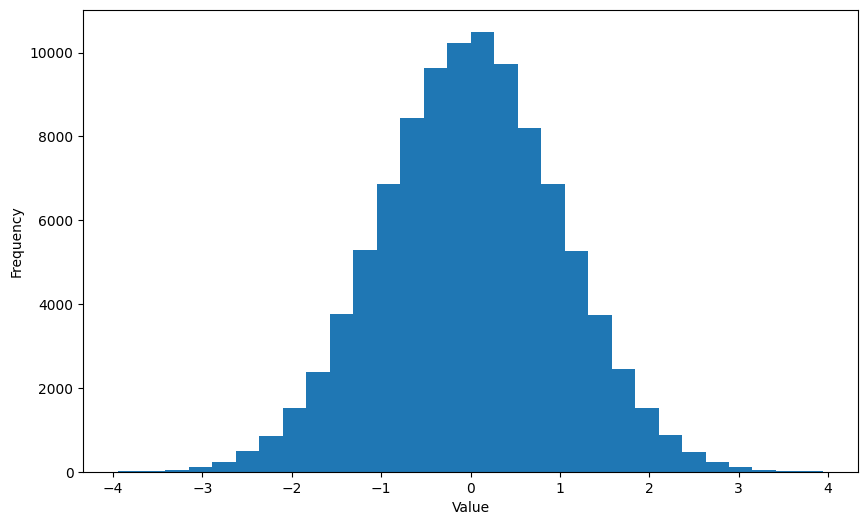

In [20]:
np.random.seed(42)
histdata = np.random.normal(loc=0, scale=1, size=100000)
data_filtered = histdata[(histdata < 4) & (histdata > -4)]

plt.figure(figsize=(10,6))
plt.hist(data_filtered, bins=30)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

___

#### **Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.**

- **Code taken and adapten from Machine Learning Fundamentals Week 3 Material**
- Quadratic Polynomial Coefficients decided from playing with the graph here: 
    - https://www.desmos.com/calculator/dz0kvw0qjg

In [21]:
random_state = 42

def make_quadratic_model(n_samples=10, noise=1.0, a=1, b=0, c=0, lb=0, ub=20, random_state=random_state): 
    """
    Generates a quadratic dataset of the form y = ax^2 + bx + c with added Gaussian noise.

    Parameters:
        n_samples (int): Number of data points.
        noise (float): Standard deviation of the Gaussian noise.
        a, b, c (float): Coefficients of the quadratic function y = ax^2 + bx + c.
        lb, ub (float): Lower and upper bounds for X values.
        random_state (int): Seed for reproducibility.

    Returns:
        X (numpy array): Feature values reshaped for ML models.
        y (numpy array): Target values.
    """
    
    # Define the function without undefined variables
    def quadratic_function(x):
        return a * x**2 + b * x + c

    # Generate random X values within the range
    np.random.seed(random_state)
    X = np.linspace(lb, ub, n_samples)

    # Compute y values with noise
    y = quadratic_function(X) + np.random.normal(0, noise, size=n_samples)

    return X.reshape(-1,1), y.reshape(-1,1) 

In [22]:
x_0, y_0 = make_quadratic_model(n_samples=12, a=0.65, b=-8, c=27, lb=0, ub=12, noise=4.0, random_state=42)

x_0.flatten()
y_0.flatten()

array([28.98685661, 18.49322379, 15.23042357, 13.87228471,  3.5311551 ,
        1.76593151,  8.80114878,  6.88296206,  4.81135865, 13.28263687,
       15.22897386, 22.73708099])

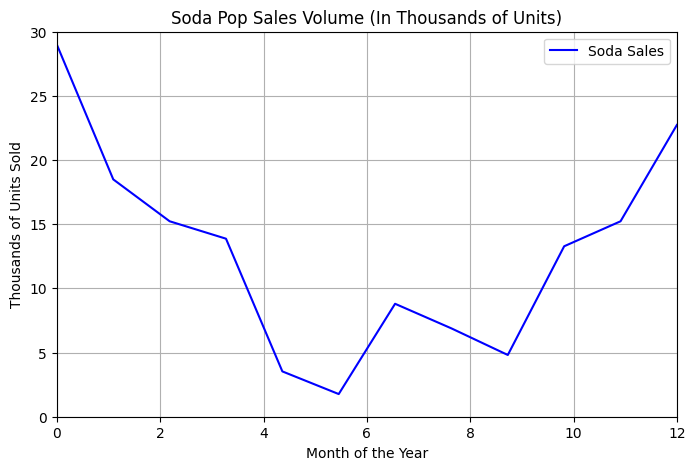

In [23]:
plt.figure(figsize=(8, 5))

# First Figure
plt.plot(x_0, y_0,color='blue', label=f'Soda Sales')

plt.xlabel('Month of the Year')
plt.ylabel('Thousands of Units Sold')
plt.title(f'Soda Pop Sales Volume (In Thousands of Units)')
plt.xlim(0, 12)
plt.ylim(0, 30)
plt.legend()
plt.grid(True)
plt.show()

___

#### **Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.**

In [24]:
x_1, y_1 = make_quadratic_model(n_samples=12, a=0.65, b=-8, c=+27, lb=0, ub=12, noise=1.0, random_state=42)
x_2, y_2 = make_quadratic_model(n_samples=12, a=-0.65, b=5.7, c=3.5, lb=0, ub=12, noise=4.9, random_state=42)

In [25]:
# Convert (10,1) arrays to (10,) 1D arrays
x_1 = x_1.flatten()
y_1 = y_1.flatten()
x_2 = x_2.flatten()
y_2 = y_2.flatten()

In [26]:
print(f" X_1 shape {x_1.shape}\n y_1 shape {y_1.shape} \n x_2 shape {x_2.shape} \n y_2 shape {y_2.shape}")

 X_1 shape (12,)
 y_1 shape (12,) 
 x_2 shape (12,) 
 y_2 shape (12,)


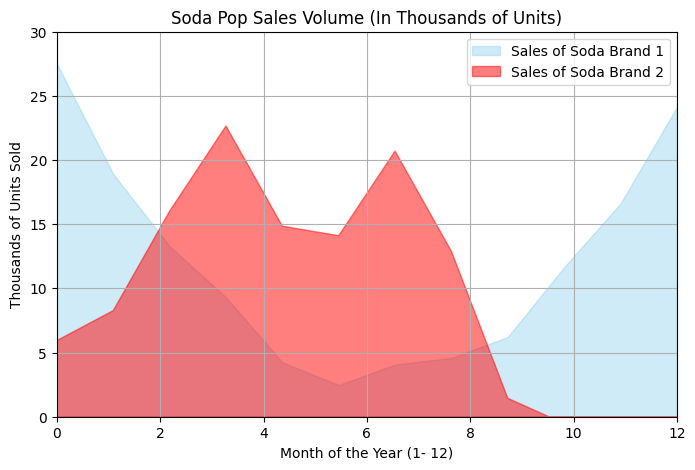

In [27]:

      
plt.figure(figsize=(8, 5))

# First Figure
plt.fill_between(x_1, y_1,color='skyblue', alpha=0.4, label=f'Sales of Soda Brand 1')
plt.fill_between(x_2, y_2, color='red', alpha=0.5, label=f"Sales of Soda Brand 2")

plt.xlabel('Month of the Year (1- 12)')
plt.ylabel('Thousands of Units Sold')
plt.title(f'Soda Pop Sales Volume (In Thousands of Units)')
plt.xlim(0, 12)
plt.ylim(0, 30)
plt.legend()
plt.grid(True)
plt.show()

# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

___

**Reproducing the Visiualization on page 81 but without the noise indicated by the Author**

#### **Data**

In [28]:
Provider_Attributes = ['Demonstration of Results', 'Content Expertise', 'Local Knowledge', 'National Reputation', 'Affordability of Services', 'Previous Work Together', 'Colleague Recommendation']
Survey_Results = [0.8, 0.6, 0.4, 0.25, 0.2, 0.2, 0.05]

Provider_Statistics = pd.DataFrame({
    'Attributes': Provider_Attributes,
    'Survey Results': Survey_Results
})

Provider_Statistics

,Attributes,Survey Results
0,Demonstration of Results,0.80
1,Content Expertise,0.60
2,Local Knowledge,0.40
3,National Reputation,0.25
4,Affordability of Services,0.20
5,Previous Work Together,0.20
6,Colleague Recommendation,0.05


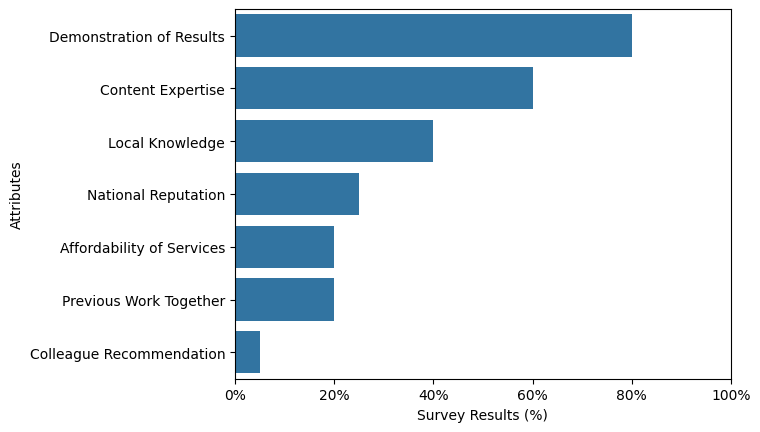

In [29]:
ax = sns.barplot(data=Provider_Statistics, x='Survey Results', y='Attributes')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))  


plt.xlabel("Survey Results (%)")
plt.xlim(0, 1)
plt.show()

ChatGPT was used to help format the ticks as percentages -- The chat is linked here: 
- https://chatgpt.com/share/67b79ec9-1ed0-800f-9e20-c3f18cb68aea